In [1]:
import pandas as pd

In [2]:
# df = pd.read_csv('../data/sales.csv')
df = pd.read_csv('sales.csv')
df.dropna(subset=['price'], inplace=True)

In [3]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


In [4]:
df['year'] = pd.to_datetime(df.purchase_date).dt.year
train_raw = df[df.year < 2015]
test_raw = df[df.year >= 2015]

# 1. Model building

<font color='red'>Assignment:</font> Get **luxury** (**price** higher than 500k dollars) as targets, and build a end-to-end model to predict wheather a product is **luxury** using **cost** values.

In [ ]:
# train_raw['price'] = train_raw['price'].map(lambda x: x if type(x) is float else float(x.strip('$').replace(',', '')))
# test_raw['price'] = test_raw['price'].map(lambda x: x if type(x) is float else float(x.strip('$').replace(',', '')))

In [ ]:
# train_raw['luxury'] = ''
# test_raw['luxury'] = ''
# train_raw['luxury'].values[:] = 0
# test_raw['luxury'].values[:] = 0
# train_raw['luxury'][train_raw[train_raw.price > 500000].index] = 1
# test_raw['luxury'][test_raw[test_raw.price > 500000].index] = 1

In [ ]:
# y_train = train_raw.luxury
# y_test = test_raw.luxury

In [5]:
# Train and test data

features = list(df.columns)
target = ["price", "luxury"]
features = [fea for fea in features if fea not in target]

X_train = train_raw[features]
X_test = test_raw[features]

y_train = train_raw["price"].map(lambda x: 1 if float(x.strip("$").replace(",", "")) > 500000 else 0)
y_test = test_raw["price"].map(lambda x: 1 if float(x.strip("$").replace(",", "")) > 500000 else 0)

In [6]:
class Cost_Transformer(object):
    
    def fit(self, X, y=None):
        df = pd.DataFrame()
        df['cost'] = X.cost.map(self.cost2num)
        self.mean = df.mean()
        
    def transform(self, X, y=None):
        df = pd.DataFrame()
        df['cost'] = X.cost.map(self.cost2num)
        return df.fillna(self.mean)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

    def cost2num(self, x):
        if type(x) == str: 
            x = x.strip('$').strip('k')
            return float(x)*1000
        else:
            return x

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [ ]:
steps = [('ctf', Cost_Transformer()),
         ('rescale', MinMaxScaler()),
         ('logr', LogisticRegression(class_weight='balanced'))]
model = Pipeline(steps)
model = model.fit(train_raw, y_train)

In [ ]:
y_train_pred = model.predict(train_raw)
y_test_pred = model.predict(test_raw)

In [ ]:
print(train_raw.cost)

0       $333k
1         NaN
2       $270k
4        $97k
5        $59k
        ...  
3190    $254k
3191     $91k
3193      NaN
3195     $44k
3196    $128k
Name: cost, Length: 2757, dtype: object


# 2. Probability

## 2.1 Predict_proba

<font color='red'>Assignment:</font> Use the **predict_proba** function of the model to make predictions for the training and testing sets and assign the outputs to variables **y_train_proba** and **y_test_proba**.

In [ ]:
y_train_proba = model.predict_proba(train_raw)

In [ ]:
y_test_proba = model.predict_proba(test_raw)

<font color='red'>Question:</font> What are the shapes of **y_train_proba** and **y_test_proba**? Why are they different from the outputs obtained with the **predict** function? Which parts of **y_train_proba** and **y_test_proba** should we care about in this case? 

In [ ]:
y_train_proba.shape

(2757, 2)

In [ ]:
y_test_proba.shape

(429, 2)

In [ ]:
y_test_proba

array([[0.66162999, 0.33837001],
       [0.67508952, 0.32491048],
       [0.67508952, 0.32491048],
       [0.66162999, 0.33837001],
       [0.89338056, 0.10661944],
       [0.88365903, 0.11634097],
       [0.89615435, 0.10384565],
       [0.73991718, 0.26008282],
       [0.83948254, 0.16051746],
       [0.66162999, 0.33837001],
       [0.80358939, 0.19641061],
       [0.66162999, 0.33837001],
       [0.66162999, 0.33837001],
       [0.80358939, 0.19641061],
       [0.04875918, 0.95124082],
       [0.41364604, 0.58635396],
       [0.85227839, 0.14772161],
       [0.75656138, 0.24343862],
       [0.66162999, 0.33837001],
       [0.66162999, 0.33837001],
       [0.61447294, 0.38552706],
       [0.80358939, 0.19641061],
       [0.66162999, 0.33837001],
       [0.88861252, 0.11138748],
       [0.56703201, 0.43296799],
       [0.15013482, 0.84986518],
       [0.69624844, 0.30375156],
       [0.66162999, 0.33837001],
       [0.1713027 , 0.8286973 ],
       [0.00433921, 0.99566079],
       [0.

### The output from predict is the values of 0 or 1 while the output of predict_prob has two columns: the first column is the probability of predicting 0, the second column is the probability of predicting 1.
### In this case, we should care about the second column, probability of 1.

<font color='red'>Question:</font> What is the range of the values in **y_train_proba** and **y_test_proba**? What do the values mean?

In [ ]:
import numpy as np

print('The range of y_train_proba is: (', np.min(y_train_proba), ',', np.max(y_train_proba), ')')

The range of y_train_proba is: ( 0.0009317947071890709 , 0.9990682052928109 )


In [ ]:
# correct way
print('The range of y_train_proba is: (', np.min(y_train_proba[:,1]), ',', np.max(y_train_proba[:,1]), ')')

The range of y_train_proba is: ( 0.09337985566062995 , 0.9990682052928109 )


In [ ]:
print('The range of y_test_proba is: (', np.min(y_test_proba), ',', np.max(y_test_proba), ')')

The range of y_test_proba is: ( 0.004339213460594404 , 0.9956607865394056 )


In [ ]:
# correct way
print('The range of y_train_proba is: (', np.min(y_test_proba[:,1]), ',', np.max(y_test_proba[:,1]), ')')

The range of y_train_proba is: ( 0.09337985566062995 , 0.9956607865394056 )


## 2.2 Threshold

<font color='red'>Assignment:</font> Plot **y_test_proba** versus **cost** and compare it with the plot of **y_test** versus **cost**.

In [ ]:
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
costtrans = Cost_Transformer()

In [ ]:
cost = costtrans.fit_transform(test_raw)

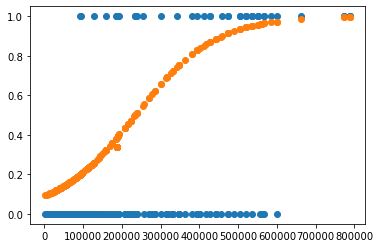

In [ ]:
plt.scatter(cost, y_test)
plt.scatter(cost, y_test_proba[:, 1])

<font color='red'>Assignment:</font> Calculate **y_test_pred** using **predict** function. Plot **y_test_proba** versus **cost** and compare it with the plot of **y_test_pred** versus **cost**.

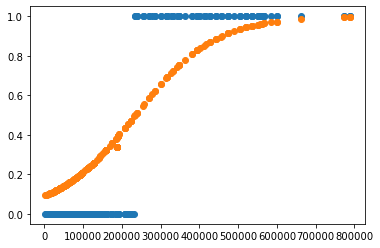

In [ ]:
plt.scatter(cost, y_test_pred)
plt.scatter(cost, y_test_proba[:, 1])

<font color='red'>Question:</font> How can we transform **y_test_proba** to **y_test_pred**? What is the default threshold?

### If the proba value is larger than certain threshold, we set pred to be 1, otherwise 0. The default threshold is 0.5

<font color='red'>Assignment:</font> Change the threshold value applied in the transformation from **y_test_proba** to **y_test_pred**, and visualize how the threshold value changes **precision**, **recall**, and **f1 score**. 

In [ ]:
# y_test_pred_new = (y_test_proba[:, 1] >= 0.6).astype(int)

In [ ]:
# plt.scatter(cost, y_test_pred_new)

In [ ]:
# thresh = [0.1*i for i in range(0, 11)]

In [ ]:
# from sklearn.metrics import precision_recall_fscore_support

# precision = []
# recall = []
# f1 = []
# for i in thresh:
#     y_test_pred_i = (y_test_proba[:, 1] >= i).astype(int)
#     result = precision_recall_fscore_support(y_test, y_test_pred_i, average='weighted')
#     precision.append(result[0])
#     recall.append(result[1])
#     f1.append(result[2])

In [ ]:
# plt.scatter(thresh, precision)

In [ ]:
# plt.scatter(thresh, recall)

In [ ]:
# plt.scatter(thresh, f1)

C:\Users\logos\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


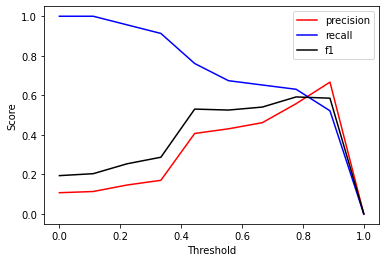

In [ ]:
# Plot metrics scores v.s. threshold
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.linspace(0, 1, 10)
precisions = []
recalls = []
f1s = []
ave = "binary"

for cut in thresholds:
    y_test_predic = (y_test_proba[:, 1] > cut).astype(int)
    precisions.append(precision_score(y_test, y_test_predic, average=ave))
    recalls.append(recall_score(y_test, y_test_predic, average=ave))
    f1s.append(f1_score(y_test, y_test_predic, average=ave))

plt.plot(thresholds, precisions, color="red", label="precision")
plt.plot(thresholds, recalls, color="blue", label="recall")
plt.plot(thresholds, f1s, color="black", label="f1")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

<font color='red'>Question:</font> What threshold value would you like to choose? How do we decide which threshold to choose? Could you provide some examples?

### <font color = 'blue'> I would choose 0.3. It's the optimal choice based on all three scores. </font>

<font color='red'>Question:</font> Is the threshold a hyper parameter? What kind of dataset should we use to find the threshold?

### The threshold is not a hyper parament. It does not change the result of the prediction. It only changes how to define yes or no. 
### <font color = 'blue'> What datasets? </font> Train data

## 2.3 ROC AUC

<font color='red'>Assignment:</font> Calculate the train and test **roc_auc_score**s. 

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_train_proba[:, 1])

0.8540709119789114

In [ ]:
roc_auc_score(y_test, y_test_proba[:, 1])

0.8788454989215575

<font color='red'>Question:</font> What do **ROC** and **AUC** stand for? 

### ROC stands for Receiver Operating Characteristics and AUC stands Area Under Curve.

<font color='red'>Assignment:</font> Plot the ROC curve of test scores, use the **roc_curve** module in sklearn to obtain relevant data. 

In [ ]:
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_proba[:, 1])

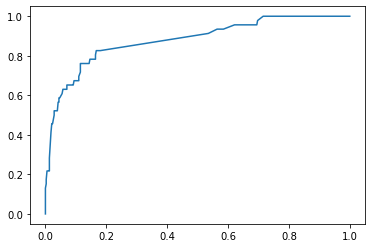

In [ ]:
plt.plot(fpr,tpr)

#### <font color='red'>Note:</font> find the best threshold: top left point

<font color='red'>Question:</font> What are the x and y axes? 

### The x axes is the false positive rate (recall or sensitivity) and the y axes is the true positive rate.

<font color='red'>Question:</font> What is the range of **roc_auc_score**? What does it mean when **roc_auc_score** is greater than, equal to, or less than 0.5?

### The range is between 0 and 1. 
### When the score is 0, it means the classifier is perfectly incorrect, it is predicting the incorrect choice 100% of the time. If the score is 1, it means the classifier is perfectly correct. If the score is 0.5, it means the predictor makes random guesses.

## 2.4 Log Loss

**Knowledge:** The loss function for logistic regression is called **log loss** or **cross entropy**.

### Binary classification
y is the target, p is the probability of the positive class
![image.png](attachment:image.png)

<font color='red'>Assignment:</font> Calculate the train and test log loss.

In [1]:
from sklearn.metrics import log_loss

log_loss(y_train, y_train_proba)

NameError: ignored

In [ ]:
log_loss(y_test, y_test_proba)

<font color='red'>Question:</font> Which of these following terms are sensitive to base rates: **log loss**, **ROC AUC**, and **threshold**?

### <font color = 'blue'> ROC AUC (wrong!) and threshold are sensitive to base rate. </font>

### log loss (contribution/penalty from the minority class is low, thus need to balance class_weight) and threshold

<font color='red'>Question:</font> If you are assigned to build a classification model to help increasing the response rate in direct mail marketing, what will be the target for you model? Which metrics will you use to evaluate the performance of your model?

### Target: The probability of whether or not the customer will respond.
### <font color = 'blue'> I will use ROC AUC. </font>

![image-2.png](attachment:image-2.png)

# 3. Correlation between features and target

<font color='red'>Assignment:</font> Plot the distributions of **cost** values for positive and negative **luxury** items, respectively, in one figure. Use the data in the training set.

In [ ]:
# costtrans = Cost_Transformer()

In [ ]:
# cost = costtrans.fit_transform(train_raw)

In [ ]:
# ind_1 = np.where(y_train == 1)

In [ ]:
# ind_0 = np.where(y_train == 0)

In [ ]:
# plt.scatter(np.ones(len(ind_1[0])), [cost.values[i] for i in ind_1])
# plt.scatter(np.zeros(len(ind_0[0])), [cost.values[i] for i in ind_0])

In [ ]:
# Plot cost distribution

data = {
    "cost": model[0].transform(X_train)["cost"],
    "luxury": train_raw["price"].map(lambda x: 1 if float(x.strip("$").replace(",", "")) > 500000 else 0)
}
cost_by_lux = pd.DataFrame(data).groupby("luxury")

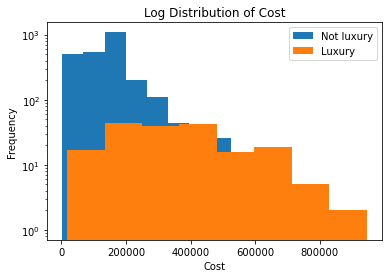

In [ ]:
len_0 = len(cost_by_lux.get_group(0))
len_1 = len(cost_by_lux.get_group(1))
n_bins_0 = 1 + int(np.log2(len_0))
n_bins_1= 1 + int(np.log2(len_1))

plt.hist(cost_by_lux.get_group(0)["cost"], log=True, label="Not luxury", bins=n_bins_0)
plt.hist(cost_by_lux.get_group(1)["cost"], log=True, label="Luxury", bins=n_bins_1)
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.title("Log Distribution of Cost")
plt.legend(loc="best")
plt.show()

#### <font color='red'>Note:</font> luxury defined by price, not cost

<font color='red'>Question:</font> From the above figure, can you tell how good **cost** is a predictor for luxury?

### <font color = 'blue'> It looks like cost is not a great predictor for luxury. It does well with true negative predictions, but it is not as great in predicting true positive. ???</font>

### As the cost ditribution of non-luxury samples is skewed to low cost, while cost of luxury samples is centered at medium cost. These two classes are decently seperated by cost, thus cost is a good predictor for luxury.

#### <font color='red'>Note:</font> this is a very good analysis for classification problems, to check if a feature is a good indicator or not

**Example:** Mannualy calculate the ROC AUC score of cost predictor. We can use this method to estimate the importance of a feature, before we use it in a model.

In [ ]:
# preparation
train = Cost_Transformer().fit_transform(train_raw)
train['price'] = y_train
train.head()

,cost,price
0,333000.000000,0
1,166184.183143,0
2,270000.000000,0
4,97000.000000,0
5,59000.000000,0


In [ ]:
# number of positive data points
num_pos = sum(train.price)
# number of negative data points
num_neg = len(train) - num_pos
# thresholds
ths = sorted(list(train.cost.unique()))

In [ ]:
tprs = []
fprs = []
auc = 0.0
tpr0 = 1.0
fpr0 = 1.0
for th in ths:
    # true positive rates
    true_pos = sum(train[train['cost'] >= th]['price'])
    tpr = true_pos / num_pos
    tprs.append(tpr)
    
    # false positive rates
    false_pos = sum(train['cost'] >= th) - true_pos
    fpr = false_pos / num_neg
    fprs.append(fpr)
    
    # area under curve
    auc += (fpr0 - fpr) * (tpr0 + tpr)/2.0
    fpr0 = fpr
    tpr0 = tpr
    

Text(0, 0.5, 'true positive rate')

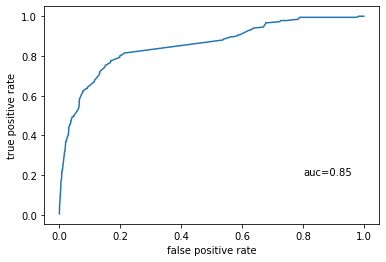

In [ ]:
plt.plot(fprs, tprs)
plt.text(0.8, 0.2, 'auc={0:.2f}'.format(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')